In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv('C:\\Users\\Ankit\\Desktop\\college studies material\\internship\\T 1\\student_studies_hours.csv')
ds.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# data analysis

In [3]:
X = ds.iloc[:,:-1].values
y = ds.iloc[:,1].values

In [4]:
ds.shape

(25, 2)

In [5]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
ds.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
print(ds.isnull().values.any())

False


In [8]:
print(ds.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


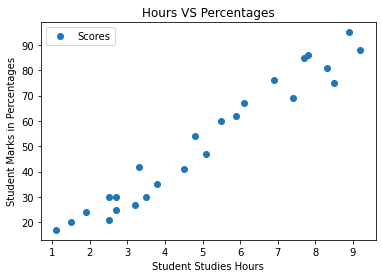

In [9]:
ds.plot(x='Hours',y='Scores',style = 'o')
plt.title('Hours VS Percentages')
plt.xlabel('Student Studies Hours')
plt.ylabel('Student Marks in Percentages')
plt.show()

# Linear Regression(y=mx+c)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [12]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
li_re = LinearRegression()
li_re.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print('dataset(ds) Trained')

dataset(ds) Trained


In [34]:
#value of c
li_re.coef_

array([9.91065648])

In [35]:
#value of intercepte(m)
li_re.intercept_

2.0181600414346974

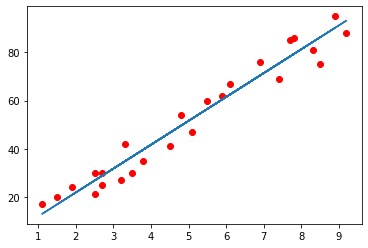

In [36]:
#ploting regressor line
line = li_re.coef_*X + li_re.intercept_

#ploting tested data
plt.scatter(X,y,color='r')
plt.plot(X,line)
plt.show()

In [37]:
print(X_test) # testing data in Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
y_pred = li_re.predict(X_test) # predictiing the score
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual and predicted data

In [40]:
df = pd.DataFrame({'Actual data':y_test,'Predicted data':y_pred})
df

,Actual data,Predicted data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting scores(marks in percentage) for 9.25hr/day study

In [42]:
# test with my own data like 9.25
hours = 9.25
my_pred= li_re.predict([[hours]])
print("No of hours = {}".format(hours))
print("Predicted score = {}".format(my_pred[0]))

No of hours = 9.25
Predicted score = 93.69173248737535


# Error checking

In [43]:
from sklearn import metrics

In [44]:
print('Mean absolute error',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error 4.183859899002975


In [45]:
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared error: 21.598769307217406


In [46]:
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared error: 4.647447612100367


In [47]:
d=np.array([[9.25]])
e= li_re.predict(d)
e

array([93.69173249])